In [86]:
import pandas as pd
import numpy as np
!pip install pmdarima
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
PATH = "/content/drive/MyDrive/Time Series Analysis/Stock Prices Analysis & Prediction/Data Set/BAJFINANCE.csv"

In [57]:
df = pd.read_csv(PATH)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5070 non-null   object 
 1   Symbol              5070 non-null   object 
 2   Series              5070 non-null   object 
 3   Prev Close          5070 non-null   float64
 4   Open                5070 non-null   float64
 5   High                5070 non-null   float64
 6   Low                 5070 non-null   float64
 7   Last                5070 non-null   float64
 8   Close               5070 non-null   float64
 9   VWAP                5070 non-null   float64
 10  Volume              5070 non-null   int64  
 11  Turnover            5070 non-null   float64
 12  Trades              2291 non-null   float64
 13  Deliverable Volume  4624 non-null   float64
 14  %Deliverble         4624 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 594.3

In [59]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5.070000e+03,5.070000e+03,2291.000000,4.624000e+03,4624.000000
mean,1311.476312,1312.330276,1334.300828,1289.349586,1312.278836,1312.154980,1312.440830,5.060571e+05,1.294532e+14,47105.843736,1.419690e+05,0.643712
std,1782.013137,1781.955970,1808.504414,1753.704145,1782.393446,1782.186659,1781.824954,1.798886e+06,4.906711e+14,101514.259444,3.495895e+05,0.233522
min,24.500000,25.200000,25.200000,24.500000,24.500000,24.500000,25.200000,3.000000e+00,1.047000e+07,21.000000,6.000000e+00,0.057500
25%,105.400000,104.275000,108.625000,100.725000,106.937500,107.725000,106.685000,4.697750e+03,6.755000e+10,1519.500000,4.745750e+03,0.478650
50%,536.375000,534.975000,552.000000,522.150000,536.400000,537.725000,537.990000,1.567200e+04,7.783766e+11,9603.000000,1.381950e+04,0.681950
75%,1757.525000,1764.012500,1784.600000,1740.550000,1760.037500,1757.750000,1758.297500,8.194950e+04,2.306237e+13,48836.000000,6.951800e+04,0.832850
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,979111.000000,3.690656e+06,1.000000


In [60]:
df.shape

(5070, 15)

In [61]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
5,2000-01-10,BAJAUTOFIN,EQ,42.90,42.05,44.90,41.0,43.00,42.90,42.47,4700,1.996100e+10,NaN,NaN,NaN
6,2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.5,40.25,40.10,40.25,5500,2.213900e+10,NaN,NaN,NaN
7,2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.0,39.00,39.00,39.80,1000,3.980000e+09,NaN,NaN,NaN
8,2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.5,39.50,39.50,39.37,1000,3.937000e+09,NaN,NaN,NaN
9,2000-01-14,BAJAUTOFIN,EQ,39.50,39.00,40.50,39.0,39.90,39.90,39.72,1700,6.752000e+09,NaN,NaN,NaN


In [62]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5065,2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
5066,2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
5067,2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840
5068,2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021
5069,2020-08-31,BAJFINANCE,EQ,3670.80,3715.00,3749.85,3465.00,3478.50,3487.80,3602.93,8529788,3.073224e+15,293454.0,1321559.0,0.1549


In [63]:
df.set_index("Date",inplace=True)

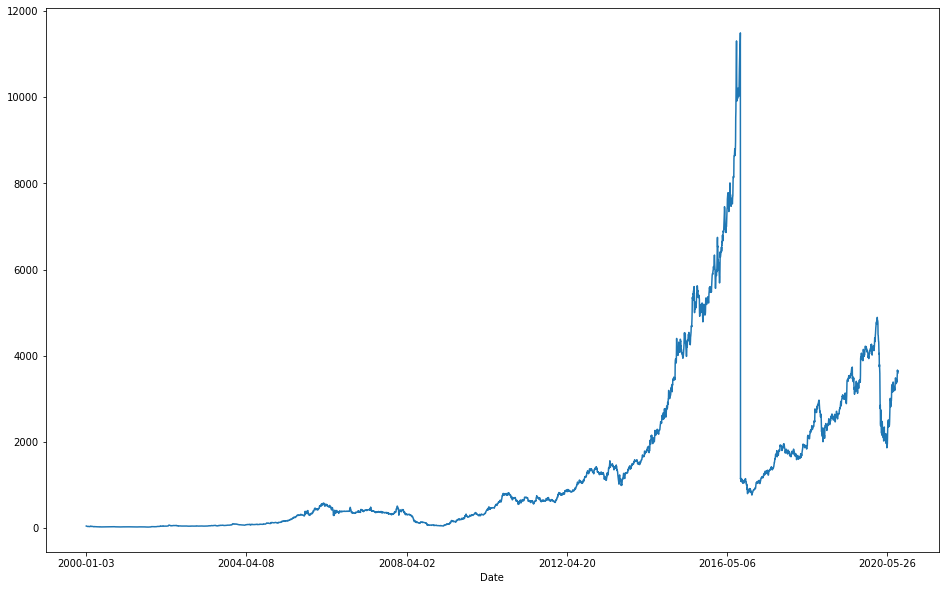

In [64]:
df['VWAP'].plot(figsize=(16,10))

In [65]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [66]:
data_df = df.copy()

In [67]:
data_df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [68]:
lag_features = ['High','Low','Volume','Turnover','Trades']
window1 =3
window2 =7

for feature in lag_features:
    data_df[feature+"rolling_mean_3"] = data_df[feature].rolling(window=window1).mean()
    data_df[feature+"rolling_mean_7"] = data_df[feature].rolling(window=window2).mean()

for feature in lag_features:
    data_df[feature+'rolling_std_3']=data_df[feature].rolling(window=window1).std()
    data_df[feature+'rolling_std_7']=data_df[feature].rolling(window=window2).std()

In [69]:
data_df.head(10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN,50.450000,NaN,46.333333,NaN,5366.666667,NaN,2.607750e+10,NaN,NaN,NaN,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN,48.866667,NaN,44.866667,NaN,4900.000000,NaN,2.258067e+10,NaN,NaN,NaN,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN,47.133333,NaN,42.900000,NaN,4400.000000,NaN,1.967250e+10,NaN,NaN,NaN,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,NaN,NaN
2000-01-10,BAJAUTOFIN,EQ,42.90,42.05,44.90,41.0,43.00,42.90,42.47,4700,1.996100e+10,NaN,NaN,NaN,46.300000,NaN,41.700000,NaN,4800.000000,NaN,2.102133e+10,NaN,NaN,NaN,1.571623,NaN,0.608276,NaN,1352.774926,NaN,6.065909e+09,NaN,NaN,NaN
2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.5,40.25,40.10,40.25,5500,2.213900e+10,NaN,NaN,NaN,44.966667,47.464286,40.833333,43.371429,4566.666667,5142.857143,1.921850e+10,2.334793e+10,NaN,NaN,3.000556,3.709528,1.258306,3.052712,1006.644591,1466.125441,3.353967e+09,7.780466e+09,NaN,NaN
2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.0,39.00,39.00,39.80,1000,3.980000e+09,NaN,NaN,NaN,42.300000,45.928571,39.833333,42.300000,3733.333333,4200.000000,1.536000e+10,1.848250e+10,NaN,NaN,2.463737,4.300664,1.040833,3.087610,2400.694344,1722.401424,9.915353e+09,7.711740e+09,NaN,NaN
2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.5,39.50,39.50,39.37,1000,3.937000e+09,NaN,NaN,NaN,41.000000,44.185714,39.000000,40.957143,2500.000000,3628.571429,1.001867e+10,1.557636e+10,NaN,NaN,1.000000,3.191880,0.500000,2.146980,2598.076211,2045.901827,1.049654e+10,8.903806e+09,NaN,NaN


In [71]:
data_df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [70]:
data_df.shape

(5070, 34)

In [72]:
data_df.isna().sum()

Symbol                       0
Series                       0
Prev Close                   0
Open                         0
High                         0
Low                          0
Last                         0
Close                        0
VWAP                         0
Volume                       0
Turnover                     0
Trades                    2779
Deliverable Volume         446
%Deliverble                446
Highrolling_mean_3           2
Highrolling_mean_7           6
Lowrolling_mean_3            2
Lowrolling_mean_7            6
Volumerolling_mean_3         2
Volumerolling_mean_7         6
Turnoverrolling_mean_3       2
Turnoverrolling_mean_7       6
Tradesrolling_mean_3      2781
Tradesrolling_mean_7      2785
Highrolling_std_3            2
Highrolling_std_7            6
Lowrolling_std_3             2
Lowrolling_std_7             6
Volumerolling_std_3          2
Volumerolling_std_7          6
Turnoverrolling_std_3        2
Turnoverrolling_std_7        6
Tradesro

In [73]:
data_df.dropna(inplace=True)

In [79]:
data_df.shape

(2285, 34)

In [75]:
ind_features =['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [76]:
training_data=data_df[0:1800]
testing_data=data_df[1800:]

In [80]:
model = auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.520, Time=4.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.212, Time=2.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.335, Time=2.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.307, Time=3.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=2.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.222, Time=3.82 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 19.195 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [81]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [83]:
forecast =  model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [84]:
test_data['forecast_ARIMA']= forecast

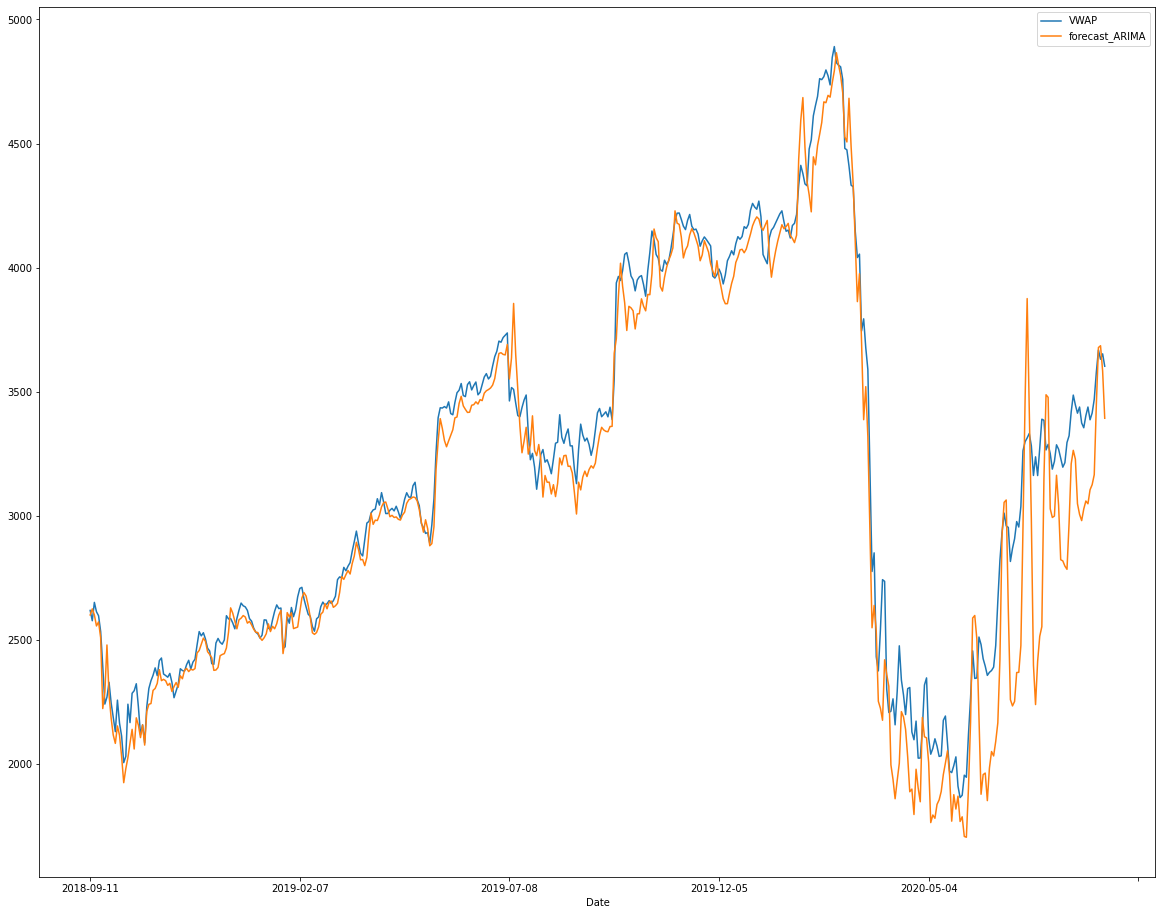

In [85]:
test_data[['VWAP',"forecast_ARIMA"]].plot(figsize=(20,16))

In [88]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['forecast_ARIMA']))

187.68491107117785

In [91]:
mean_absolute_error(test_data['VWAP'],test_data['forecast_ARIMA'])

124.58918825193469